In [2]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

from pytorch_drl.algs.ppo import PPO
from notebook_utils import plot, mean_filter
import pytorch_drl.models.actor_critic_models as models

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## Create environment

In [4]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## PPO Test

../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)


Avg score: 195.06 i: 157                       Solved! Episode 157


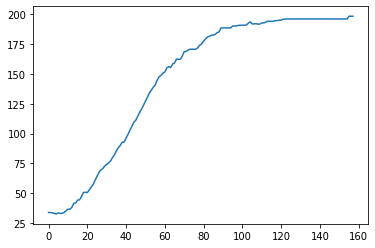

In [5]:
tmax = 200
n_episodes = 2000

n_env = 8
epochs = 4
batch_size = 16 * n_env #tmax * n_env // 4    #32

ppo_model = models.ActorCriticMLP(state_size, action_size, env.action_space)
# init agent:
agent = PPO(ppo_model,
            env_name,
            n_env=n_env,
            epochs=epochs,
            lr=1e-4,
            critic_coef=0.5,
            max_grad_norm=0.5,
            mini_batch_size=batch_size,
            device=device
            )
max_score = 195.
model_name = "ppo_{}".format(env_name)
# train the agent
scores, losses = agent.train(tmax, n_episodes,  env, max_score, model_name)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
plt.plot(x, scores, label = "scores")
plt.show()

### Trained Agent Demonstration

In [8]:
agent.test(env, render=True, n_episodes=4)

200.0
200.0
200.0
200.0


200.0

### Save Trajectory

In [10]:
trajectories = agent.save_trajectories(300_000//n_env, "experts/ppo_{}".format(env_name), action_size)

37450 / 37500                                  

## PPO Continuous Test


State size: 3 
Action size: 1


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Avg score: -172.59 i: 999                      

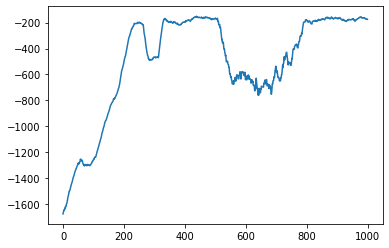

In [8]:
env_name = "Pendulum-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.shape[0]

print("State size:", state_size, "\nAction size:", action_size)

tmax = 200
n_episodes = 1000

n_env = 8
epochs = 4
batch_size = 16 * n_env #tmax * n_env // 4    #32

ppo_model = models.ActorCriticMLP(state_size, action_size, env.action_space, H=64)
# init agent:
agent = PPO(ppo_model,
            env_name,
            n_env=n_env,
            epochs=epochs,
            lr=1e-3,
            critic_coef=0.5,
            max_grad_norm=0.5,
            mini_batch_size=batch_size,
            device=device
            )
max_score = -20.
model_name = "ppo_{}".format(env_name)
# train the agent
scores, losses = agent.train(tmax, n_episodes,  env, max_score, model_name)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
#losses = mean_filter(losses, 50)
plt.plot(x, scores, label = "scores")
#plt.plot(x, losses, label = "losses")
#plt.legend()
plt.show()

### Trained Agent Demonstration

In [6]:
agent.test(env, render=True, n_episodes=4)

-130.0888981019225
-122.29028083635971
-121.80319605225704
-251.3278058433072


-251.3278058433072